In [208]:
import pytest
import sys
import os 
import pandas as pd
import importlib
# dir_path = os.path.abspath(os.path.join(os.path.dirname( __file__ ), '..'))
# sys.path.append(dir_path)
# config
%matplotlib inline
sys.path.append('/workspace')

In [211]:
from modules.Transformers import DateNormalizer as dmod
from modules.Visualizations import LineChart as lcmod
from modules.Visualizations import Table as tmod
from modules.Reports import GenericReport as grmod
from modules.Reports import ReportABC as rmod
importlib.reload(dmod)
importlib.reload(lcmod)
importlib.reload(tmod)
importlib.reload(grmod)
importlib.reload(rmod)

<module 'modules.Transformers.DateNormalizer' from '/workspace/modules/Transformers/DateNormalizer.py'>

<module 'modules.Visualizations.LineChart' from '/workspace/modules/Visualizations/LineChart.py'>

<module 'modules.Visualizations.Table' from '/workspace/modules/Visualizations/Table.py'>

<module 'modules.Reports.GenericReport' from '/workspace/modules/Reports/GenericReport.py'>

<module 'modules.Reports.ReportABC' from '/workspace/modules/Reports/ReportABC.py'>

In [212]:
from modules.Pipeline import Pipeline as p
from modules.CM_API import CM_API as cm
from modules.Transformers.DateNormalizer import DateNormalizer as dn
from modules.Visualizations.LineChart import LineChart as lc
from modules.Visualizations.Table import Table as tbl
from modules.Reports.GenericReport import GenericReport as gr

In [213]:
test_obj = cm()
test_network_data = test_obj.get_coinmetrics_network_data(api_key='KKzV6V2DTY87v3m1dGZu', asset='eth', metrics='AdrActCnt,TxCnt', start='2019-01-01', end='2019-01-07')

In [214]:
test_network_data.head()

,time,AdrActCnt,TxCnt
0,2019-01-01T00:00:00.000Z,227755.0,448168.0
1,2019-01-02T00:00:00.000Z,266633.0,589959.0
2,2019-01-03T00:00:00.000Z,298379.0,596620.0
3,2019-01-04T00:00:00.000Z,264923.0,549398.0
4,2019-01-05T00:00:00.000Z,257064.0,511189.0


uhhh


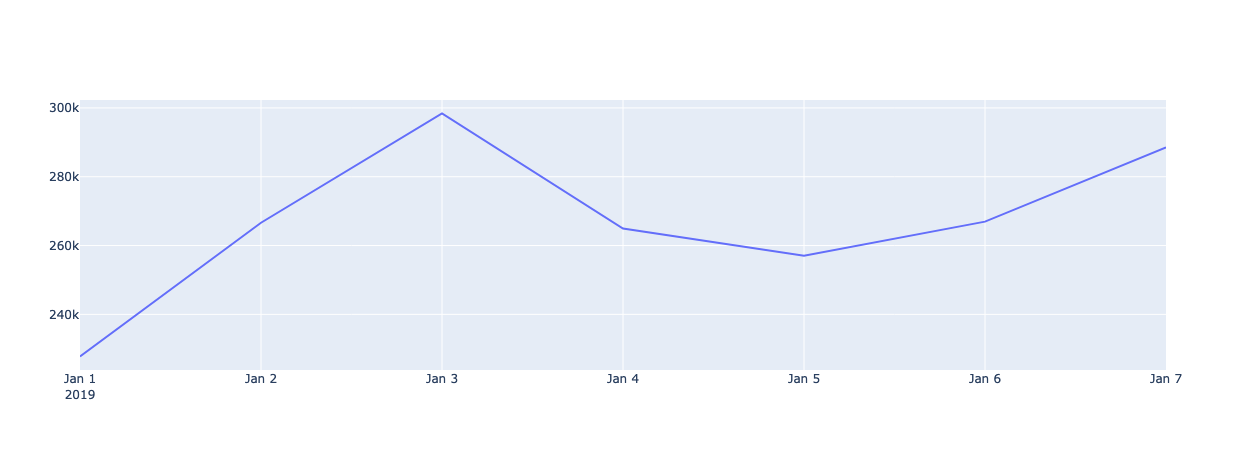

In [215]:
_transformers = [dn()]
_visualizations = [lc(chart_title='test', y_axis_columns=['AdrActCnt'])]
_df = cm().get_coinmetrics_network_data(api_key='KKzV6V2DTY87v3m1dGZu', asset='eth', metrics='AdrActCnt,TxCnt', start='2019-01-01', end='2019-01-07')

test_report = gr(report_title='test report', transformers=_transformers, visualizations=_visualizations, df=_df)
test_report.run_report()

TRANSFORMERS []
uhhh


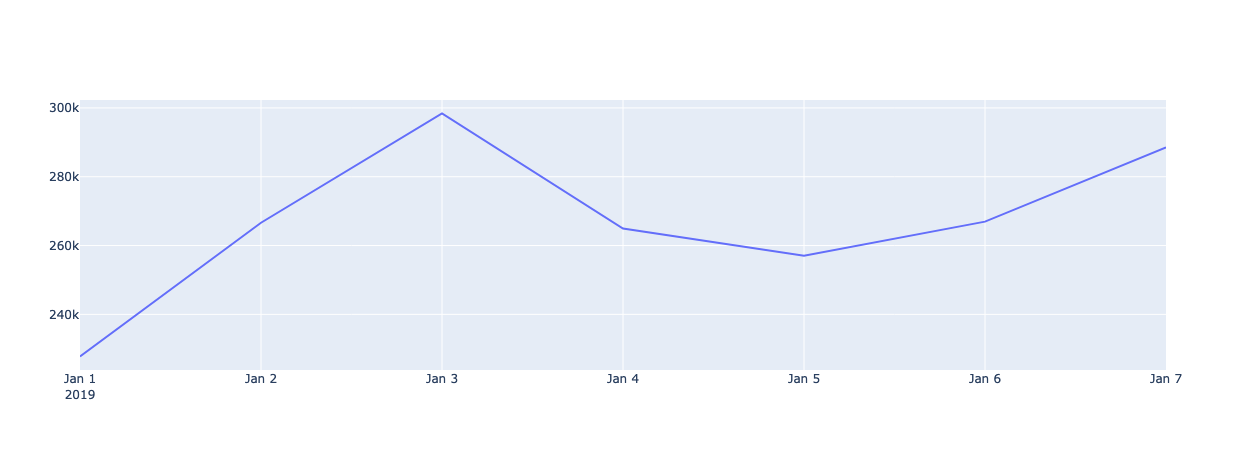

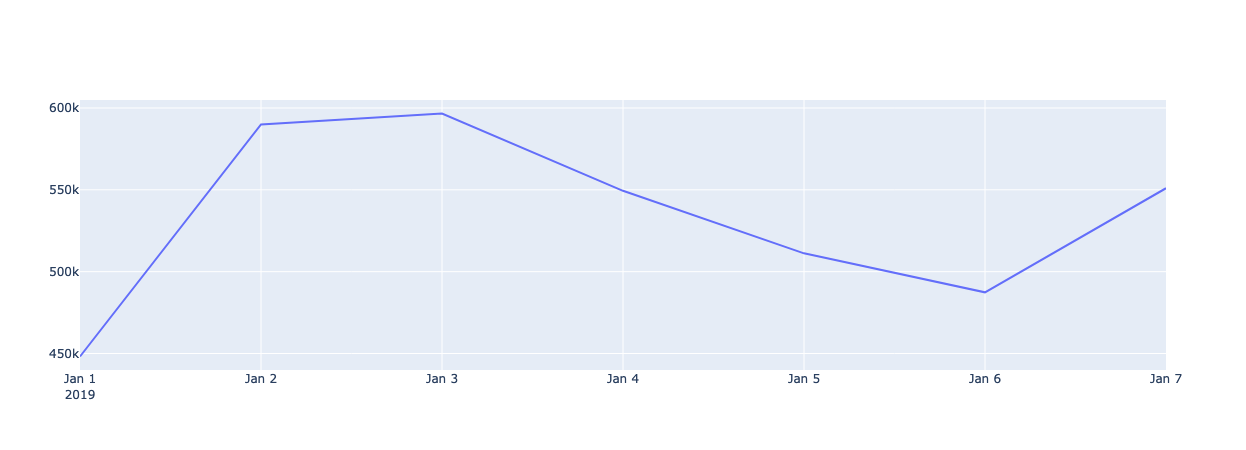

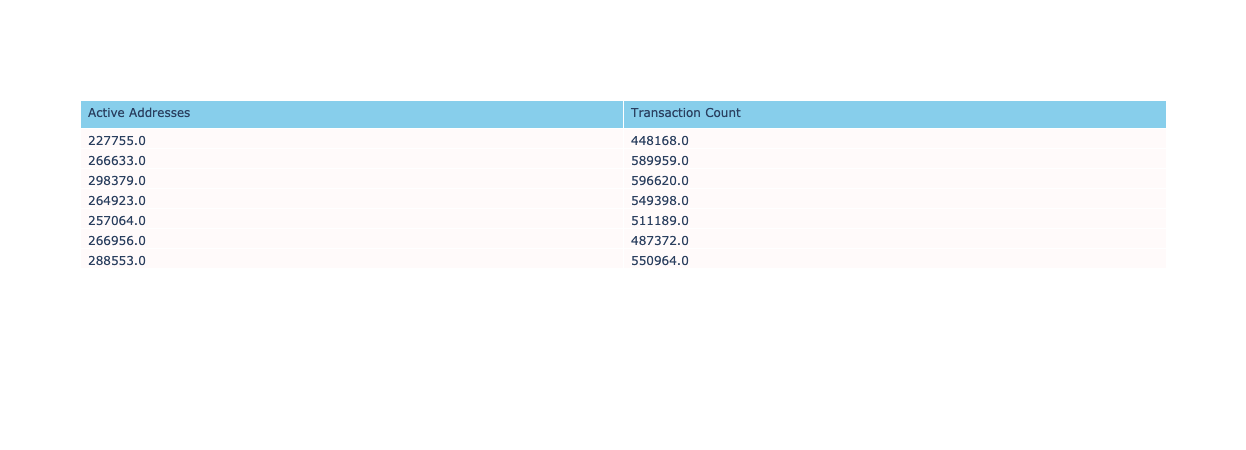

In [218]:
test_pipeline = p()
test_obj = cm()
test_network_data = test_obj.get_coinmetrics_network_data(api_key='KKzV6V2DTY87v3m1dGZu', asset='eth', metrics='AdrActCnt,TxCnt', start='2019-01-01', end='2019-01-07')
test_chart = lc(chart_title='test', y_axis_columns=['AdrActCnt'])
test_chart_2 = lc(chart_title='test 2', y_axis_columns=['TxCnt'])
test_table = tbl(table_title='test table', table_headers=['Active Addresses', 'Transaction Count'], table_columns=['AdrActCnt', 'TxCnt'])
test_pipeline.load_data(df=test_network_data)
test_pipeline.load_transformers(transformers=[dn()])
test_pipeline.execute_transformers()


test_pipeline.load_visualizations(visualizations=[test_chart, test_chart_2, test_table])
test_pipeline.render_visualizations()
# test_pipeline.get_data()

In [217]:
%qtconsole 